In [1]:
%load_ext autoreload
%matplotlib inline
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
import sys

In [3]:
sys.path.append("..")

from WatChMaL.analysis.multi_plot_utils import multi_disp_learn_hist, multi_compute_roc, multi_plot_roc
from WatChMaL.analysis.comparison_utils import multi_get_masked_data, multi_collapse_test_output
from WatChMaL.analysis.plot_utils import plot_classifier_response, plot_reduced_classifier_response, plot_2D_classifier_response

In [4]:
label_dict         = {"$\gamma$":0, "$e$":1, "$\mu$":2, '$\pi^0$':3}
inverse_label_dict = {0:"$\gamma$", 1:"$e$", 2:"$\mu$", 3:'$\pi^0$'}

muon_softmax_index_dict = {"non-mu":0, "mu":1}

c = plt.rcParams['axes.prop_cycle'].by_key()['color']

In [ ]:
locs_4_class = ['/data/WatChMaL/data/WatChMaL_short_tank_results/4_classes/OD_veto_w_testing/4_Class_OD_Veto_run1/outputs',
                '/data/WatChMaL/data/WatChMaL_short_tank_results/4_classes/OD_veto_w_testing/4_Class_OD_Veto_run2/outputs']

titles_4_class = ['4 Class Run 1','4 Class Run 2']

linecolor_4_class = [c[0] for _ in locs_4_class]
linestyle_4_class = ['-' for _ in locs_4_class]

raw_output_softmax_4_class = [np.load(loc + "/softmax.npy") for loc in locs_4_class]
raw_actual_labels_4_class  = [np.load(loc + "/labels.npy") for loc in locs_4_class]
raw_actual_indices_4_class = [np.load(loc + "/indices.npy") for loc in locs_4_class]

In [5]:
locs_4_updated_class = ['/home/hlahiouel/WatChMaL/outputs/2021-03-01/12-52-40/outputs',
                        '/home/hlahiouel/WatChMaL/outputs/2021-03-01/13-08-00/outputs',
                        '/home/hlahiouel/WatChMaL/outputs/2021-03-02/07-43-59/outputs',
                        '/home/hlahiouel/WatChMaL/outputs/2021-03-02/08-01-05/outputs',
                        '/home/hlahiouel/WatChMaL/outputs/2021-03-01/12-52-40/outputs']

titles_4_updated_class = ['4 Class Run 1','4 Class Run 2','4 Class Run 3','4 Class Run 4','4 Class Run 5']

linecolor_4_updated_class = [c[1] for _ in locs_4_updated_class]
linestyle_4_updated_class = ['-' for _ in locs_4_updated_class]

raw_output_softmax_4_updated_class = [np.load(loc + "/softmax.npy") for loc in locs_4_updated_class]
raw_actual_labels_4_updated_class  = [np.load(loc + "/labels.npy") for loc in locs_4_updated_class]
raw_actual_indices_4_updated_class = [np.load(loc + "/indices.npy") for loc in locs_4_updated_class]

In [ ]:
locs_4_class_40_epochs = ['/home/hlahiouel/WatChMaL/outputs/2021-03-04/07-18-02/outputs',
                          '/home/hlahiouel/WatChMaL/outputs/2021-03-04/07-19-28/outputs']

titles_4_class_40_epochs = ['4 Class Run 1 - 40 epochs - Barrel Fix ','4 Class Run 2 - 40 epochs - Barrel Fix']

linecolor_4_class_40_epochs = [c[2] for _ in locs_4_updated_class]
linestyle_4_class_40_epochs = ['-' for _ in locs_4_updated_class]

raw_output_softmax_4_class_40_epochs = [np.load(loc + "/softmax.npy") for loc in locs_4_class_40_epochs]
raw_actual_labels_4_class_40_epochs = [np.load(loc + "/labels.npy") for loc in locs_4_class_40_epochs]
raw_actual_indices_4_class_40_epochs = [np.load(loc + "/indices.npy") for loc in locs_4_class_40_epochs]

In [6]:
titles = titles_4_updated_class

linecolor = linecolor_4_updated_class
linestyle = linestyle_4_updated_class

softmaxes = raw_output_softmax_4_updated_class
labels    = raw_actual_labels_4_updated_class

In [7]:
fprs, tprs, thrs = multi_compute_roc(softmaxes, labels, 
                                                     true_label=label_dict["$e$"], 
                                                     false_label=label_dict["$\gamma$"],
                                                     normalize=True)

[<AxesSubplot:>]
[<AxesSubplot:title={'center':'$e$ vs $\\gamma$ Rejection '}, xlabel='$e$ Signal Efficiency', ylabel='$\\gamma$ Background Rejection'>]
[<AxesSubplot:title={'center':'$e$ vs $\\gamma$ Rejection '}, xlabel='$e$ Signal Efficiency', ylabel='$\\gamma$ Background Rejection'>]
[<AxesSubplot:title={'center':'$e$ vs $\\gamma$ Rejection '}, xlabel='$e$ Signal Efficiency', ylabel='$\\gamma$ Background Rejection'>]
[<AxesSubplot:title={'center':'$e$ vs $\\gamma$ Rejection '}, xlabel='$e$ Signal Efficiency', ylabel='$\\gamma$ Background Rejection'>]


../WatChMaL/analysis/plot_utils.py:620: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  ax1.set_ylim(ylim[0],ylim[1])
../WatChMaL/analysis/plot_utils.py:620: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  ax1.set_ylim(ylim[0],ylim[1])
../WatChMaL/analysis/plot_utils.py:620: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  ax1.set_ylim(ylim[0],ylim[1])
../WatChMaL/analysis/plot_utils.py:620: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  ax1.set_ylim(ylim[0],ylim[1])
../WatChMaL/analysis/plot_utils.py:620: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  ax1.set_ylim(ylim[0],ylim[1])


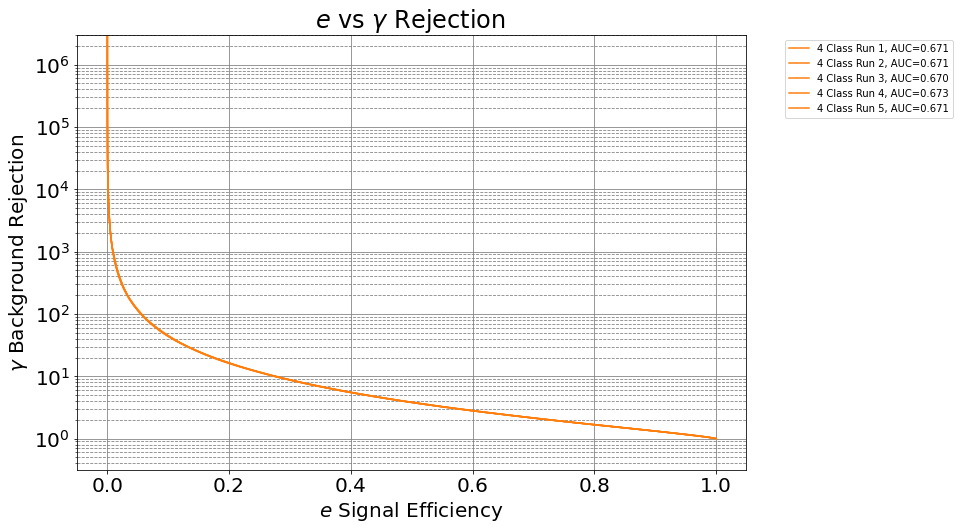

In [8]:
figs = multi_plot_roc(fprs, tprs, thrs, "$e$", "$\gamma$", 
                      fig_list=[1], ylims=[[0,3e6]], 
                      linestyles=linestyle,linecolors=linecolor, 
                      plot_labels=titles, show=False)


[<AxesSubplot:>]
[<AxesSubplot:title={'center':'$e$ vs $\\gamma$ Rejection '}, xlabel='$e$ Signal Efficiency', ylabel='$\\gamma$ Background Rejection'>]
[<AxesSubplot:title={'center':'$e$ vs $\\gamma$ Rejection '}, xlabel='$e$ Signal Efficiency', ylabel='$\\gamma$ Background Rejection'>]
[<AxesSubplot:title={'center':'$e$ vs $\\gamma$ Rejection '}, xlabel='$e$ Signal Efficiency', ylabel='$\\gamma$ Background Rejection'>]
[<AxesSubplot:title={'center':'$e$ vs $\\gamma$ Rejection '}, xlabel='$e$ Signal Efficiency', ylabel='$\\gamma$ Background Rejection'>]


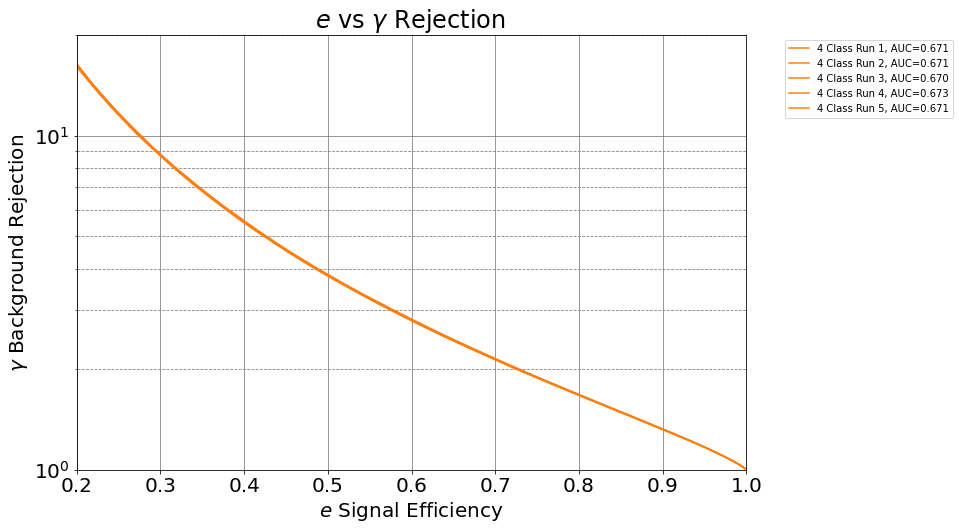

In [9]:
figs = multi_plot_roc(fprs, tprs, thrs, "$e$", "$\gamma$", 
                      fig_list=[1], 
                      xlims=[[0.2,1.0]],ylims=[[1e0,2e1]],
                      linestyles=linestyle,linecolors=linecolor, 
                      plot_labels=titles, show=False)

In [ ]:
muon_softmax_index_dict = {"e/gamma":0, "mu":1}

In [ ]:
collapsed_class_scores_list, collapsed_class_labels_list = multi_collapse_test_output(softmaxes, labels, label_dict, ignore_type='$\gamma$', ignore_type2='$\pi^0$')

collapsed_class_labels_list = [collapsed_class_labels - 1 for collapsed_class_labels in collapsed_class_labels_list]
collapsed_class_scores_list = [collapsed_class_scores[:, 1:] for collapsed_class_scores in collapsed_class_scores_list]

In [ ]:
############# compute short tank multi e/gamma ROC #############
fprs, tprs, thrs = multi_compute_roc(collapsed_class_scores_list, collapsed_class_labels_list, 
                                                         true_label=muon_softmax_index_dict["e/gamma"], 
                                                         false_label=muon_softmax_index_dict["mu"],
                                                         normalize=True)

In [ ]:
figs = multi_plot_roc(fprs, tprs, thrs, "e/gamma", "mu",
                      fig_list=[1], ylims=[[0,3e6]], 
                      linestyles=linestyle,linecolors=linecolor, 
                      plot_labels=titles, show=False)

In [ ]:
figs = multi_plot_roc(fprs, tprs, thrs, "e/gamma", "mu",
                      fig_list=[1], 
                      xlims=[[0.2,1.0]], ylims=[[0,5e3]],
                      linestyles=linestyle,linecolors=linecolor, 
                      plot_labels=titles, show=False)